In [16]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

In [17]:
# Load the Data

data_dir = pathlib.Path('./data/tiny-imagenet-200')
image_count = len(list(data_dir.glob('**/*.JPEG')))
CLASS_NAMES = np.array([item.name for item in (data_dir / 'train').glob('*')])
num_classes = len(CLASS_NAMES)
print('Discovered {} images in {} classes'.format(image_count, num_classes))

# Create the training data generator
batch_size = 32
im_height = 64
im_width = 64
num_epochs = 1

data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
])

# Load Data from folders
data = {
    'train': datasets.ImageFolder(root=data_dir / 'train', transform=data_transforms),
    'valid': datasets.ImageFolder(root=data_dir / 'val', transform=data_transforms),
    'test': datasets.ImageFolder(root=data_dir / 'test', transform=data_transforms)
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])
test_data_size = len(data['test'])

# Create iterators for the Data loaded using DataLoader module
train_data_loader = DataLoader(data['train'], batch_size=batch_size, shuffle=True)
valid_data_loader = DataLoader(data['valid'], batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(data['test'], batch_size=batch_size, shuffle=True)





# train_set = torchvision.datasets.ImageFolder(data_dir / 'train', data_transforms)
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
#                                            shuffle=True, num_workers=4, pin_memory=True)



# # Set train and valid directory paths
# train_directory = os.path.join(dataset, 'train')
# valid_directory = os.path.join(dataset, 'valid')
# test_directory = os.path.join(dataset, 'test')

# # Batch size
# bs = 32

# # Number of classes
# num_classes = len(os.listdir(valid_directory))-1  #10#2#257
# print(num_classes)

# # Load Data from folders
# data = {
#     'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
#     'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid']),
#     'test': datasets.ImageFolder(root=test_directory, transform=image_transforms['test'])
# }

# # Get a mapping of the indices to the class names, in order to see the output classes of the test images.
# idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
# print(idx_to_class)

# # Size of Data, to be used for calculating Average Loss and Accuracy
# train_data_size = len(data['train'])
# valid_data_size = len(data['valid'])
# test_data_size = len(data['test'])

# # Create iterators for the Data loaded using DataLoader module
# train_data_loader = DataLoader(data['train'], batch_size=bs, shuffle=True)
# valid_data_loader = DataLoader(data['valid'], batch_size=bs, shuffle=True)
# test_data_loader = DataLoader(data['test'], batch_size=bs, shuffle=True)

Discovered 129998 images in 200 classes
{0: 'n01443537', 1: 'n01629819', 2: 'n01641577', 3: 'n01644900', 4: 'n01698640', 5: 'n01742172', 6: 'n01768244', 7: 'n01770393', 8: 'n01774384', 9: 'n01774750', 10: 'n01784675', 11: 'n01855672', 12: 'n01882714', 13: 'n01910747', 14: 'n01917289', 15: 'n01944390', 16: 'n01945685', 17: 'n01950731', 18: 'n01983481', 19: 'n01984695', 20: 'n02002724', 21: 'n02056570', 22: 'n02058221', 23: 'n02074367', 24: 'n02085620', 25: 'n02094433', 26: 'n02099601', 27: 'n02099712', 28: 'n02106662', 29: 'n02113799', 30: 'n02123045', 31: 'n02123394', 32: 'n02124075', 33: 'n02125311', 34: 'n02129165', 35: 'n02132136', 36: 'n02165456', 37: 'n02190166', 38: 'n02206856', 39: 'n02226429', 40: 'n02231487', 41: 'n02233338', 42: 'n02236044', 43: 'n02268443', 44: 'n02279972', 45: 'n02281406', 46: 'n02321529', 47: 'n02364673', 48: 'n02395406', 49: 'n02403003', 50: 'n02410509', 51: 'n02415577', 52: 'n02423022', 53: 'n02437312', 54: 'n02480495', 55: 'n02481823', 56: 'n02486410', 

In [18]:
train_data_size, valid_data_size, test_data_size

(100000, 9999, 10000)

In [19]:
# Load pretrained ResNet50 Model
model = models.resnet50(pretrained=True)
model = model.to('cuda:0')

In [5]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
# Freeze model parameters
for param in model.parameters():
    param.requires_grad = False

In [21]:
# Change the final layer of ResNet50 Model for Transfer Learning
fc_inputs = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, num_classes), # Since 10 possible outputs
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

# Convert model to be used on GPU
model = model.to('cuda:0')

In [22]:
# Define Optimizer and Loss Function
# loss_func = nn.NLLLoss()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [23]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25, save_location='./models'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0
    
    print_every = 50

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs), flush=True)
        
        # Set to training mode
        model.eval()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
#             print(labels)
            outputs = model(inputs)
            loss = loss_criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            if (epoch * train_data_size + i) % print_every == 0:
                print("Batch number: {:03d}/{:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, train_data_size // batch_size, loss.item(), acc.item()), flush=True)

            if i == (train_data_size // batch_size // 3):
                break
            
        # Validation - No gradient tracking needed
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)
                loss = loss_criterion(outputs, labels)
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, save_location+'/model_'+str(epoch)+'.pt')
            
    return model, history

In [55]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Print the model to be trained
# summary(model, input_size=(3, 224, 224), batch_size=batch_size, device='cuda')

# Train the model for 25 epochs
num_epochs = 10
trained_model, history = train_and_validate(model, loss_func, optimizer, num_epochs)

torch.save(history, 'image_net'+'_history.pt')

Epoch: 1/3
Batch number: 000/3125, Training: Loss: 4.6625, Accuracy: 0.0938
Batch number: 050/3125, Training: Loss: 4.7143, Accuracy: 0.0312
Batch number: 100/3125, Training: Loss: 4.9169, Accuracy: 0.0000
Batch number: 150/3125, Training: Loss: 4.3047, Accuracy: 0.0938
Batch number: 200/3125, Training: Loss: 4.5111, Accuracy: 0.0000
Batch number: 250/3125, Training: Loss: 4.7360, Accuracy: 0.0625
Batch number: 300/3125, Training: Loss: 4.4573, Accuracy: 0.0625
Batch number: 350/3125, Training: Loss: 4.6760, Accuracy: 0.0625
Batch number: 400/3125, Training: Loss: 4.7112, Accuracy: 0.0000
Batch number: 450/3125, Training: Loss: 4.6527, Accuracy: 0.0625
Batch number: 500/3125, Training: Loss: 4.7266, Accuracy: 0.0312
Batch number: 550/3125, Training: Loss: 4.6994, Accuracy: 0.0625
Batch number: 600/3125, Training: Loss: 4.6342, Accuracy: 0.0000
Batch number: 650/3125, Training: Loss: 4.6800, Accuracy: 0.0625
Batch number: 700/3125, Training: Loss: 4.7602, Accuracy: 0.0938
Batch number: 

NameError: name 'dataset' is not defined

In [56]:
torch.save(history, 'image_net'+'_history.pt')

In [57]:
trained_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
def validate_only(model, loss_criterion, data_loader):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0
    
    print_every = 50

    epoch_start = time.time()

    # Set to training mode
    model.eval()

    # Loss and Accuracy within the epoch
    train_loss = 0.0
    train_acc = 0.0

    valid_loss = 0.0
    valid_acc = 0.0

    # Validation - No gradient tracking needed
    with torch.no_grad():
        # Set to evaluation mode
        model.eval()

        # Validation loop
        for j, (inputs, labels) in enumerate(data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            loss = loss_criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)

            # Calculate validation accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to valid_acc
            valid_acc += acc.item() * inputs.size(0)

            #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size
                
        epoch_end = time.time()
    
        print("Validation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        return avg_valid_acc, avg_valid_loss

In [11]:
def test_transform_combo(transforms_combo):
    data_transforms = transforms.Compose(transforms_combo)

    # Load Data from folders
    test_train_data = datasets.ImageFolder(root=data_dir / 'val', transform=data_transforms)

    # Size of Data, to be used for calculating Average Loss and Accuracy
    test_train_data_size = len(test_train_data)

    # Create iterators for the Data loaded using DataLoader module
    test_train_data_loader = DataLoader(test_train_data, batch_size=batch_size, shuffle=True)
    
    avg_valid_acc, avg_valid_loss = validate_only(trained_model, loss_func, test_train_data_loader)
    return avg_valid_acc, avg_valid_loss

In [12]:
methods = []
accuracies = []

In [85]:
transforms_combo = [
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("Default")
accuracies.append(avg_valid_acc)

Validation : Loss : 6.6755, Accuracy: 0.8500%, Time: 15.0988s


In [86]:
transforms_combo = [
        transforms.ColorJitter(),
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("ColorJitter")
accuracies.append(avg_valid_acc)

Validation : Loss : 6.6755, Accuracy: 0.8500%, Time: 15.0330s


In [87]:
transforms_combo = [
        transforms.RandomAffine(180),
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("RandomAffine")
accuracies.append(avg_valid_acc)

Validation : Loss : 6.3263, Accuracy: 0.7200%, Time: 15.9978s


In [88]:
transforms_combo = [
        transforms.RandomGrayscale(p=0.1),
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("RandomGrayScale0.1")
accuracies.append(avg_valid_acc)

Validation : Loss : 6.7223, Accuracy: 0.8000%, Time: 15.2699s


In [89]:
transforms_combo = [
        transforms.RandomGrayscale(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("RandomGrayScale0.5")
accuracies.append(avg_valid_acc)

Validation : Loss : 6.9007, Accuracy: 0.5800%, Time: 15.6581s


In [90]:
transforms_combo = [
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("RandomHorizontalFlip0.5")
accuracies.append(avg_valid_acc)

Validation : Loss : 6.6737, Accuracy: 0.9300%, Time: 15.2010s


In [92]:
transforms_combo = [
        transforms.RandomPerspective(),
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("RandomPerspective")
accuracies.append(avg_valid_acc)

Validation : Loss : 7.2321, Accuracy: 0.5700%, Time: 18.8493s


In [93]:
transforms_combo = [
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("RandomVerticalFlip0.5")
accuracies.append(avg_valid_acc)

Validation : Loss : 6.6585, Accuracy: 0.8900%, Time: 15.0048s


In [95]:
transforms_combo = [
        transforms.ToTensor(),
        transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
        transforms.RandomErasing()
    ]

avg_valid_acc, avg_valid_loss = test_transform_combo(transforms_combo)
methods.append("RandomErasing0.5")
accuracies.append(avg_valid_acc)

Validation : Loss : 7.0530, Accuracy: 0.7100%, Time: 15.5892s


In [96]:
methods

['Default',
 'ColorJitter',
 'RandomAffine',
 'RandomGrayScale0.1',
 'RandomGrayScale0.5',
 'RandomHorizontalFlip0.5',
 'RandomPerspective',
 'RandomVerticalFlip0.5',
 'RandomErasing0.5']

In [97]:
accuracies

[0.0085, 0.0085, 0.0072, 0.008, 0.0058, 0.0093, 0.0057, 0.0089, 0.0071]

In [100]:
import matplotlib
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


AttributeError: 'numpy.float64' object has no attribute '2f'

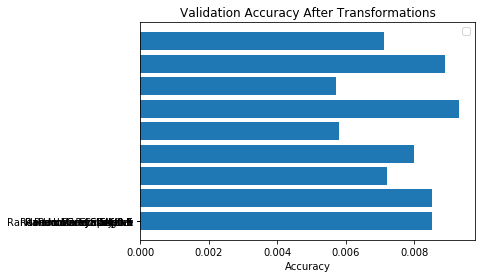

In [114]:
fig, ax = plt.subplots()
bar_acc = ax.barh(methods, accuracies)
ax.set_xlabel('Accuracy')
ax.set_title('Validation Accuracy After Transformations')
ax.set_yticks(accuracies)
ax.set_yticklabels(methods)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_width()
        ax.annotate('{0.2f}'.format(height),
                    xy=(rect.get_width(), rect.get_y() + rect.get_height()/2),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar_acc)
fig.tight_layout()

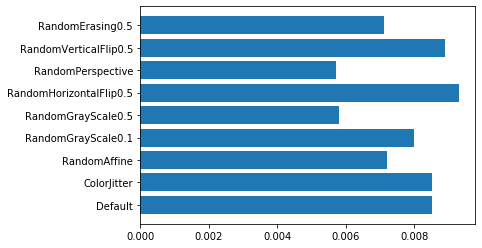

In [113]:
fig, ax = plt.subplots()
bar_acc = ax.barh(methods, accuracies)

Text(0.5, 1.0, 'Validation Accuracy Vs. Adversarial Image Type')

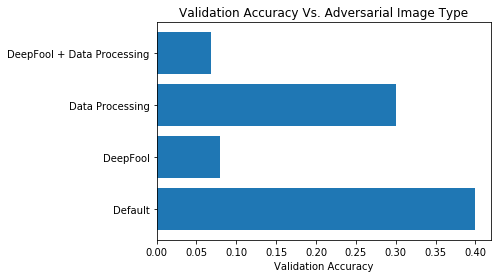

In [13]:
fig, ax = plt.subplots()
bar_acc = ax.barh(["Default", "DeepFool", "Data Processing", "DeepFool + Data Processing"], [0.4, 0.4*0.2, 0.4*0.75, 0.4*0.2*0.85])
ax.set_xlabel("Validation Accuracy")
ax.set_title("Validation Accuracy Vs. Adversarial Image Type")